## Bank Churn Predictiion

### Abstract

__Introduction to project 1 – Problem Statement:__


####  A Bank has the data for all the account holder those have opened in different region.They plan to check whether customer retention ratio is how much and check which parameters are causing to lose customer(account holder.). The dataset is provided consist of Bank customer along with the attributes across different region and account type. The task is to train a model that can predict whether a Customer would retain or leave in the Bank based on the given attributes.


#### Explanation of Feature :
         
##### Surname         	: Surname of the Customer who holds an account.
##### CreditScore      	: Credit Score which tells whether a customer has a good credit score. 
##### Geography          	: Location of the Bank and user account.
##### Gender             	: Gender of the Customer
##### Age                		: Age of the User of the bank
##### Tenure             	: How long has the customer been a member of the bank.
##### NumE Products      	: No of Product services user has availed for.
##### HasCrCard          	: Whether user has a Credit Card
##### IsActiveMember     	: Whether he is a active member.
##### EstimatedSalary    	: Estimated Salary of the User
##### Exited             		: Whether account holder still has a account in bank (Target Column)

##### Workflow

![](Project.png)

Aim : Predict whether the Customer stayed or left Company (classification)

#### Modelling


###### 1. Logistic Regression: The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. 


Code Snippets:

In [1]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
# Reading the DataFrame
df = pd.read_csv("Capstone/Bank Churn Prediction/data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df1 =df.drop(['Surname',"RowNumber","CustomerId"], axis=1)
df2 =df1.drop(["Geography","Gender"],axis=1)
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


Heat Map

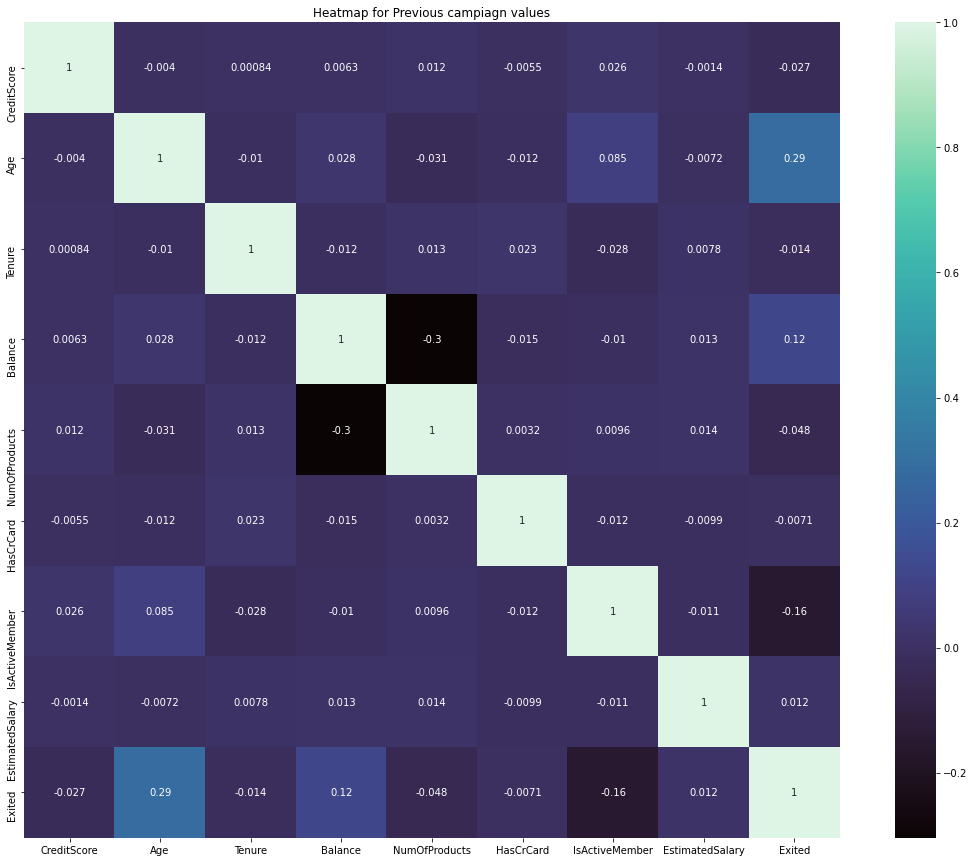

In [8]:
import seaborn as sns

plt.figure(figsize =(20,15))
sns.heatmap(df1.corr(),square = True, annot = True,cmap= 'mako' )
plt.title("Heatmap for Previous campiagn values")
plt.show()

Visualisation of Feature Relation.

In [9]:
# sns.pairplot(df)

###### 1. User From Country

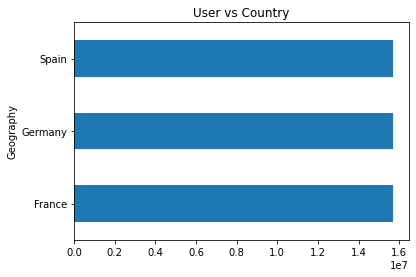

In [10]:
Graph_data = df.groupby("Geography")['CustomerId'].median().plot(kind = "barh")
plt.title("User vs Country")
plt.show()

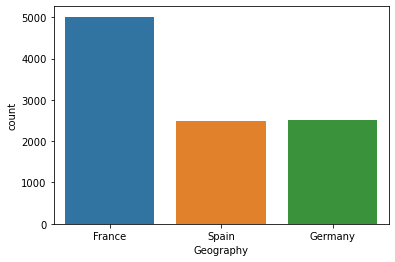

In [11]:
sns.countplot(x="Geography",data=df)

2. Check Gender Ratio , leaving ratio

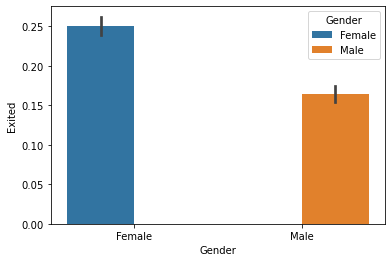

In [12]:
sns.barplot(x = 'Gender', y = 'Exited', hue = 'Gender',
           data = df)

3. Check Tenure of staying 

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

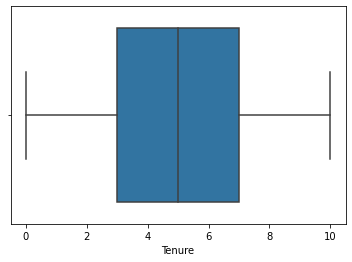

In [13]:

sns.boxplot(x=df1["Tenure"])
df["Tenure"].describe()

4. Age , Tenure Outlier

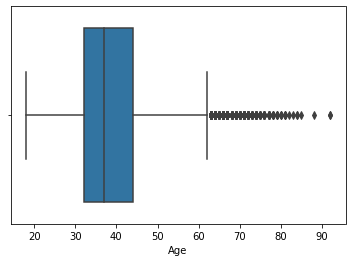

In [14]:
sns.boxplot(x=df1["Age"])
df1["Age"].describe()
age_new = df1["Age"]>60


In [15]:
#find Q1, Q3, and interquartile range for each column
import scipy.stats as stats


Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)

IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64 RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64


In [16]:
df_age=pd.DataFrame(df["Age"])
df_age.columns=['Age']
df_clean = df_age[~((df_age < lowqe_bound) |(df_age > upper_bound)).any(axis=1)]

#find how many rows are left in the dataframe 
df_clean.shape


(9641, 1)

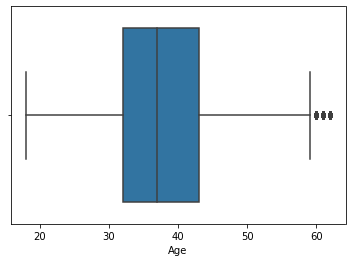

In [17]:
sns.boxplot(x=df_clean["Age"])

Sweetviz library Implementation

In [18]:
import sweetviz

In [19]:
my_report = sweetviz.analyze([df,"Insurance"],target_feat="Exited")

In [20]:
my_report.show_html("Report.html_Bank")

Report Report.html_Bank was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Importing D tale Library

In [21]:
import dtale
dtale.show(df)

# One Hot Encoding

In [23]:
Gender_dummies = pd.get_dummies(df1.Gender)
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
Country_dummies = pd.get_dummies(df.Geography, prefix='Country')


In [25]:
df3 = pd.concat([df2, Gender_dummies,Country_dummies], axis=1)

In [26]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,Country_France,Country_Germany,Country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


### Target "Exited " set

In [27]:
X = df3.iloc[:,:-8]
y = df3["Exited"]

In [28]:
print(X.head())
print(y.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard
0          619   42       2       0.00              1          1
1          608   41       1   83807.86              1          0
2          502   42       8  159660.80              3          1
3          699   39       1       0.00              2          0
4          850   43       2  125510.82              1          1
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


Checking for Imbalancy in the Data set.

In [29]:
print(X.shape)
print(y.shape)

(10000, 6)
(10000,)


Text(0, 0.5, 'Customer')

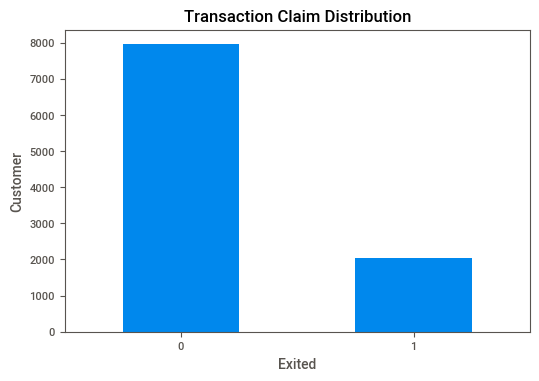

In [30]:
count_classes = pd.value_counts(df['Exited'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Claim Distribution")

# plt.xticks(range(2), LABELS)

plt.xlabel("Exited")

plt.ylabel("Customer")

This shows that the data is imbalanced as the Bar plot show.

In [31]:
Exited = df3[df3["Exited"]==1]
Stayed = df3[df3["Exited"]==0]

In [32]:
print(Exited.shape,Stayed.shape)

(2037, 14) (7963, 14)


Performing Over Sampling

In [33]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [34]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek()
X,y=smk.fit_sample(X,y)

In [35]:
X.shape,y.shape

((14278, 6), (14278,))

In [36]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 7139, 0: 7139})
Resampled dataset shape Counter({1: 7139, 0: 7139})


### Model Training :

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(y_train.sum())
print(y_test.sum())

9994
4284
4966
2173


In [38]:

from sklearn.linear_model import LogisticRegression

lg= LogisticRegression()
lg.fit(X_train,y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)



In [39]:
# Finding the Co-effiecnt 
lg.coef_

array([[-4.44449291e-03,  6.24342657e-02, -3.51733054e-03,
         4.89547954e-06, -1.70907675e-03, -1.24202371e-03]])

In [40]:
# import metrics

from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print("5.accuracy score: ",accuracy_score(y_train,y_train_pred))


# test data
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(lg, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))


 Train Data 
Recall_Score = 0.6868707209021345
precision_score = 0.6669925694172859
f1_score =  0.6767857142857142
5.accuracy score:  0.6740044026415849
1.Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      2111
           1       0.66      0.67      0.67      2173

    accuracy                           0.66      4284
   macro avg       0.66      0.66      0.66      4284
weighted avg       0.66      0.66      0.66      4284

2.F1 Score for Logistic Reg: 0.6662094192958391


3.confusion Matrix for Logistic Reg:
 [[1367  716]
 [ 744 1457]]


4.cross validation: [0.66638655 0.66904812 0.67304055]


5.accuracy score:  0.6591970121381886


In [41]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({0: 2111, 1: 2173})

## Decision Tree


In [42]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(max_depth= 3) # max_depth decide the amount of time we will divide it 

dc_model.fit(X_train,y_train)

y_train_pred = dc_model.predict(X_train)
y_test_pred = dc_model.predict(X_test)

print(y_train_pred)
print(y_test_pred)

[1 1 1 ... 1 1 0]
[0 0 0 ... 0 0 0]


In [43]:
# import metrics

from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))


# test data
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(dc_model, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

dc_model.feature_importances_


 Train Data 
Recall_Score = 0.7259363672976239
precision_score = 0.7631244707874683
f1_score =  0.7440660474716201
0.7518511106663999
1.Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      2111
           1       0.76      0.72      0.74      2173

    accuracy                           0.74      4284
   macro avg       0.74      0.74      0.74      4284
weighted avg       0.74      0.74      0.74      4284

2.F1 Score for Logistic Reg: 0.7355235168990781


3.confusion Matrix for Logistic Reg:
 [[1609  617]
 [ 502 1556]]


4.cross validation: [0.74579832 0.74238285 0.75267913]


5.accuracy score:  0.738795518207283


array([0.        , 0.60585985, 0.        , 0.        , 0.39414015,
       0.        ])

In [44]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30,max_depth=7,
                                  max_features=2)
rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[1 1 0 ... 1 1 0]
[0 0 0 ... 0 0 1]


In [45]:
# Random Forest Metrics

from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))

# test data
print("\n Test Data ")
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(rf_model, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))



 Train Data 
Recall_Score = 0.7871526379379783
precision_score = 0.8088144009931719
f1_score =  0.7978365139299929
0.8017810686411847

 Test Data 
1.Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      2111
           1       0.79      0.75      0.77      2173

    accuracy                           0.77      4284
   macro avg       0.77      0.77      0.77      4284
weighted avg       0.77      0.77      0.77      4284

2.F1 Score for Logistic Reg: 0.766839378238342


3.confusion Matrix for Logistic Reg:
 [[1666  545]
 [ 445 1628]]


4.cross validation: [0.75861345 0.77873503 0.78335785]


5.accuracy score:  0.7689075630252101


#### What is the precision, recall, accuracy of your model?

In [46]:
def logistic_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(lg, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [47]:
def random_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(rf_model, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [48]:
def decision_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(dc_model, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [49]:
print("logistic Model",logistic_model())
print("\n Random Model",random_model())
print("\n decision Model",decision_model())

1.Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      2111
           1       0.79      0.75      0.77      2173

    accuracy                           0.77      4284
   macro avg       0.77      0.77      0.77      4284
weighted avg       0.77      0.77      0.77      4284

2.F1 Score for Logistic Reg: 0.766839378238342


3.confusion Matrix for Logistic Reg:
 [[1666  545]
 [ 445 1628]]


4.cross validation: [0.66638655 0.66904812 0.67304055]


5.accuracy score:  0.7689075630252101
logistic Model None
1.Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      2111
           1       0.79      0.75      0.77      2173

    accuracy                           0.77      4284
   macro avg       0.77      0.77      0.77      4284
weighted avg       0.77      0.77      0.77      4284

2.F1 Score for Logistic Reg: 0.766839378238342


3.confusion Matrix for Logistic Reg:
 [[1666

Points to be noted :
1.SNS lib
2.EDA part

3.Hyper parameter tuning on Random Forest

In [51]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30,max_depth=7,
                                  max_features=2)

rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[1 1 0 ... 1 1 0]
[0 0 0 ... 0 0 1]


In [52]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [54]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [55]:
rf_model = RandomForestClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [58]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [59]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [60]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.765
Test Accuracy - : 0.749
